In [44]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
crypto_df = pd.read_csv(Path('crypto_data.csv'))

In [5]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [6]:
crypto_df['IsTrading']

0        True
1        True
2        True
3        True
4        True
        ...  
1247     True
1248    False
1249    False
1250    False
1251    False
Name: IsTrading, Length: 1252, dtype: bool

In [7]:
crypto_trading_df = crypto_df.loc[crypto_df['IsTrading']== True ,:]
crypto_trading_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [8]:
del crypto_trading_df['IsTrading']


In [9]:
crypto_trading_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [10]:
crypto_trading_df.dropna()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [11]:
new_crypto_df = crypto_trading_df[(crypto_trading_df.TotalCoinsMined > 0)]
new_crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [12]:
del new_crypto_df['CoinName']

In [13]:
new_crypto_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [16]:
new_crypto_df['TotalCoinSupply'] = new_crypto_df['TotalCoinSupply'].astype(float)

C:\Users\Owner\AppData\Local\Temp\ipykernel_21752\145757604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_crypto_df['TotalCoinSupply'] = new_crypto_df['TotalCoinSupply'].astype(float)


In [17]:
new_crypto_df.dtypes

Unnamed: 0          object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [18]:
cryptod_df = pd.get_dummies(new_crypto_df, dtype=float)
cryptod_df

,TotalCoinsMined,TotalCoinSupply,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.055185e+09,5.320000e+08,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.927942e+10,3.141593e+11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.792718e+07,2.100000e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.076842e+08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1242,1.493105e+07,2.500000e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1245,9.802226e+08,1.400223e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,7.296538e+06,2.100000e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.preprocessing import StandardScaler
crypto_scaled = StandardScaler().fit_transform(cryptod_df)
crypto_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, 23.04343724, ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [20]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [22]:
pca= PCA(n_components=0.90)
crypto_pca= pca.fit_transform(crypto_scaled)
crypto_pca

array([[-0.39165161,  1.25457575, -0.72306437, ...,  0.        ,
         0.        , -0.        ],
       [-0.37217432,  1.25474877, -0.72356881, ..., -1.63644686,
        -0.98860763,  0.49852241],
       [ 2.69454943,  2.0132532 , -0.83678282, ..., -1.16254654,
         0.46309092, -0.63136414],
       ...,
       [ 0.37908708, -2.81049776,  0.51595701, ...,  0.49266935,
         1.19089283,  1.05030834],
       [-0.17457094, -2.49086792,  0.5054949 , ...,  2.70045045,
         0.20646373, -0.46722253],
       [-0.33889205,  0.99812209, -0.33823862, ..., -1.5016799 ,
         0.8815776 ,  0.31152099]])

In [23]:
df_crypto_pca = pd.DataFrame(data=crypto_pca)
df_crypto_pca

,0,1,2,3,4,5,6,7,8,9,...,459,460,461,462,463,464,465,466,467,468
0,-0.391652,1.254576,-0.723064,0.001711,2.047102e-18,-1.170149e-17,-1.586763e-12,-0.008733,-1.641191,-0.065171,...,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000
1,-0.372174,1.254749,-0.723569,0.001697,1.302532e-15,-1.317293e-15,-1.580023e-12,-0.009480,-1.644621,-0.071286,...,0.334480,-2.204700,0.927727,0.374802,0.706491,-0.775562,0.737193,-1.636447,-0.988608,0.498522
2,2.694549,2.013253,-0.836783,0.005794,-7.726064e-14,-3.041365e-14,-5.141748e-12,-0.067105,-1.918658,-1.187315,...,-0.064218,0.156983,0.103499,-0.585250,-0.535068,0.563404,-0.281350,-1.162547,0.463091,-0.631364
3,-0.169686,-1.605117,0.236014,-0.001505,1.991299e-14,8.079752e-15,1.335510e-12,-0.002537,0.350015,0.316795,...,0.069585,-1.454143,-0.031327,0.037116,0.126886,-1.099446,0.851047,1.245200,0.790156,0.777467
4,-0.177381,-2.474893,0.484947,-0.002088,1.488877e-14,1.936185e-14,1.874871e-12,0.033975,0.645529,0.237500,...,1.127919,-0.122480,-0.095996,0.569264,1.041622,-0.229097,-0.254823,0.477299,-0.947083,-0.492593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.888310,0.999394,-0.087104,-0.010051,2.939015e-13,8.745010e-14,8.532945e-12,-1.043310,2.538297,4.478714,...,-0.602975,0.183239,-0.048754,0.491705,0.863316,-0.815848,-1.254141,-0.906719,1.193698,0.614777
528,-0.389367,1.254433,-0.723097,0.001714,-3.214382e-16,6.612850e-17,-1.589488e-12,-0.008763,-1.641650,-0.065985,...,0.560693,-1.479783,-0.460636,0.100783,-1.363526,1.003141,-0.383056,0.805967,0.162703,-0.783414
529,0.379087,-2.810498,0.515957,-0.001615,-5.181842e-15,1.957855e-16,1.465824e-12,0.021203,0.200309,-0.060107,...,1.126540,-2.766457,0.897518,-0.298620,0.502417,-0.840083,-0.639168,0.492669,1.190893,1.050308
530,-0.174571,-2.490868,0.505495,-0.002137,2.077116e-14,4.163513e-15,1.921519e-12,0.035467,0.676978,0.293540,...,0.187523,-1.752418,-0.059856,0.937771,-0.485109,-1.001453,-0.290246,2.700450,0.206464,-0.467223


T SNE Clustering

In [37]:
tsne = TSNE(learning_rate=65)

In [38]:
crypto_tsne = tsne.fit_transform(crypto_pca)

c:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [39]:
crypto_tsne.shape

(532, 2)

In [41]:
df2x = crypto_tsne[:,0]

# The second column of transformed features
df2y = crypto_tsne[:,1]

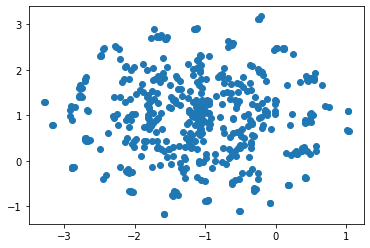

In [43]:
plt.scatter(df2x, df2y)
plt.show()

K-Means

c:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


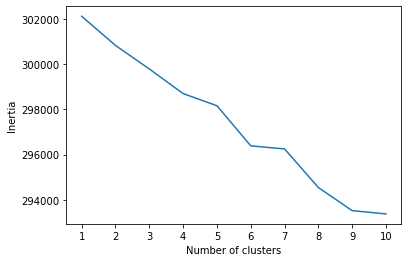

In [45]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()